In [2]:
!pip install "gluonts[mxnet]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 50.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
bigframes 1.27.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
ch

In [1]:
from gluonts.dataset.repository import get_dataset, dataset_names
from gluonts.dataset.util import to_pandas

In [9]:
import matplotlib.pyplot as plt

In [2]:
print(f"Available datasets: {dataset_names}")

Available datasets: ['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki2000_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing', 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly', 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing', 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'cif_2016', 'london_smart_meters_without_missing', 'wind_farms_without_missing', 'car_parts_without_missing', 'dominick', 'fred_md', 'pedestrian_counts', 'hospital', 'covid_deaths', 'kdd_cup_2018_without_missing', 'weather', 'm3_monthly', 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5', 'uber_tlc_daily', 'uber_tlc_hourly', 'airpassengers', 'australian_electricity_demand', 'electricity_hourly', 'electricity_weekly', 'rideshare_wit

In [18]:
dataset = get_dataset("m1_monthly", regenerate=False)

Download m1_monthly_dataset.zip:: 120kB [00:01, 85.1kB/s]
creating json files: 100%|██████████| 617/617 [00:00<00:00, 59762.27it/s]


In [19]:
dataset.metadata.__dict__

{'freq': 'M',
 'target': None,
 'feat_static_cat': [CategoricalFeatureInfo(name='feat_static_cat_0', cardinality='617')],
 'feat_static_real': [],
 'feat_dynamic_real': [],
 'feat_dynamic_cat': [],
 'prediction_length': 18}

In [20]:
dataset

TrainDatasets(metadata=MetaData(freq='M', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat_0', cardinality='617')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=18), train=Map(fn=<gluonts.dataset.common.ProcessDataEntry object at 0x7f7f5acf42e0>, iterable=JsonLinesFile(path=PosixPath('/root/.gluonts/datasets/m1_monthly/train/data.json.gz'), start=0, n=None, line_starts=[0, 482, 1273, 2127, 2697, 3537, 3899, 4354, 4722, 5112, 6122, 7128, 7735, 8333, 8907, 9786, 10397, 10924, 11803, 12437, 13071, 13709, 14224, 14626, 15200, 15776, 16301, 16841, 17370, 17848, 18240, 18733, 19244, 19703, 20163, 20617, 21073, 21530, 21979, 22439, 22899, 23359, 24281, 25203, 26114, 26717, 27333, 27690, 28042, 28316, 29230, 29774, 30563, 30975, 31569, 32439, -32570, -31927, -31524, -31212, -30800, -30083, -29345, -28556, -27484, -26409, -25395, -24762, -24123, -23068, -22185, -21135, -20456, -19878, -18910, -17989, -17287, -16544, -16054, -14981, 

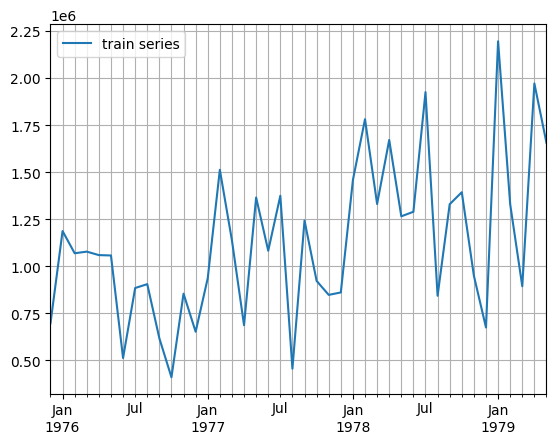

In [21]:
entry = next(iter(dataset.train))
train_series = to_pandas(entry)
train_series.plot()
plt.grid(which="both")
plt.legend(["train series"], loc="upper left")
plt.show()   ## viz training and test ds

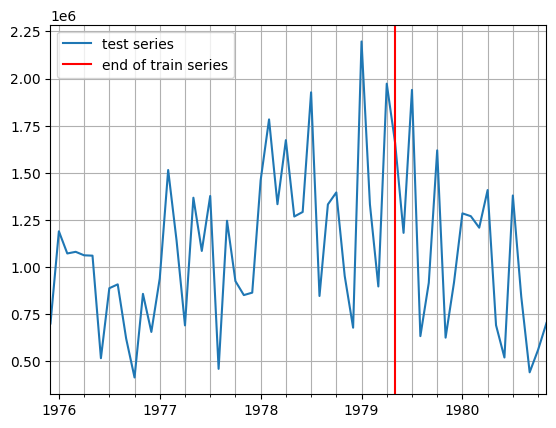

In [22]:
entry = next(iter(dataset.test))
test_series = to_pandas(entry)
test_series.plot()
plt.axvline(train_series.index[-1], color="r")  # end of train dataset
plt.grid(which="both")
plt.legend(["test series", "end of train series"], loc="upper left")
plt.show()

In [33]:
next(iter(dataset.test))

{'target': array([ 697458., 1187650., 1069690., 1078430., 1059910., 1058020.,
         512728.,  884901.,  905529.,  617722.,  410292.,  854875.,
         652371.,  937352., 1513480., 1138080.,  687150., 1366120.,
        1083180., 1375330.,  456139., 1243690.,  922653.,  848388.,
         861378., 1459230., 1782530., 1331670., 1672240., 1266130.,
        1290270., 1926500.,  843637., 1330520., 1394260.,  950071.,
         675046., 2196870., 1330660.,  894202., 1972540., 1656590.,
        1179180., 1939450.,  630177.,  913313., 1617990.,  622073.,
         915206., 1282970., 1267910., 1206720., 1406860.,  688207.,
         516501., 1378010.,  840271.,  437741.,  556951.,  700000.],
       dtype=float32),
 'start': Period('1975-12', 'M'),
 'item_id': 'T1',
 'feat_static_cat': array([0], dtype=int32)}

In [27]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import widgets, interact
import json

In [25]:

dataset_dict = {d.pop("item_id"): d for d in list(iter(dataset.test))}
series_ids = list(dataset_dict.keys())
series_dict = {k: to_pandas(v) for k, v in dataset_dict.items()}
series_df = pd.DataFrame(series_dict)

In [26]:
series_df

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T608,T609,T610,T611,T612,T613,T614,T615,T616,T617
1900-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
px.imshow(series_df.corr().round(2), text_auto=True, height=500, color_continuous_scale="balance") # most of them would be positively correlated within themselves, helpful for creating global models.

In [39]:
## small snippet to convert from pandas to gluonts format
# import numpy as np
# from gluonts.dataset.common import ListDataset


# N = 10  # number of time series
# T = 100  # number of timesteps
# freq = "1M"
# prediction_length = 6
# custom_dataset = np.random.normal(size=(N, T))
# start = pd.Period("01-01-2019", freq=freq)

# # train dataset: cut the last window of length "prediction_length", add "target" and "start" fields
# train_ds = ListDataset(
#     [{"target": x, "start": start} for x in custom_dataset[:, :-prediction_length]],
#     freq=freq,
# )
# # test dataset: use the whole dataset, add "target" and "start" fields
# test_ds = ListDataset(
#     [{"target": x, "start": start} for x in custom_dataset], freq=freq
# )

## this block could be ignored

[{'target': array([-7.83489943e-01,  6.52061224e-01, -4.39625919e-01,  5.94521582e-01,
         -1.50697613e+00, -3.43839288e-01, -1.91854405e+00,  2.96836138e-01,
          1.10314384e-01,  1.53368843e+00, -3.81066740e-01,  6.35448217e-01,
         -1.00288332e+00, -1.29005328e-01,  2.03461424e-01, -3.69848572e-02,
         -1.11912930e+00,  6.45152032e-01,  4.88490403e-01, -1.17604172e+00,
         -1.36145115e-01, -3.16428975e-03, -4.40626889e-01,  3.60159397e-01,
          5.78118026e-01,  2.13908911e-01,  2.45358348e+00,  3.07054341e-01,
         -6.63158357e-01,  6.89144611e-01,  2.34678522e-01, -9.19417977e-01,
          6.38830543e-01,  2.87539274e-01, -1.64839101e+00, -3.23147744e-01,
          7.82289684e-01, -4.65517074e-01,  8.94625127e-01, -8.36243927e-01,
          1.22722590e+00, -1.48160195e+00,  9.49957371e-01, -3.86297822e-01,
         -8.83215189e-01,  9.70272660e-01,  9.07512426e-01, -5.98115981e-01,
         -5.24383366e-01,  8.05809200e-01,  1.77683282e+00,  1.457

In [43]:
from gluonts.mx import Trainer, DeepAREstimator

In [47]:
trainer = Trainer(
    ctx="cpu",
    epochs = 5,
    num_batches_per_epoch=100,
    learning_rate = 1e-3,
    clip_gradient = 10.0,
    weight_decay = 1e-4,
    hybridize = False,
)

In [48]:
dar_estimator = DeepAREstimator(
    freq=dataset.metadata.freq,
    prediction_length=dataset.metadata.prediction_length,
    trainer=trainer,
    use_feat_static_cat=False
)
dar_predictor = dar_estimator.train(training_data=dataset.train)

/usr/local/lib/python3.10/dist-packages/gluonts/time_feature/lag.py:104: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/usr/local/lib/python3.10/dist-packages/gluonts/time_feature/_base.py:249: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

100%|██████████| 100/100 [00:25<00:00,  3.92it/s, epoch=5/5, avg_epoch_loss=5.81]


In [49]:
from gluonts.evaluation import make_evaluation_predictions


In [50]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,  # test dataset
    predictor=dar_predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

In [51]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [52]:
ts_entry = tss[0]


In [54]:
np.array(ts_entry[:5]).reshape(
    -1,
)

array([ 697458., 1187650., 1069690., 1078430., 1059910.], dtype=float32)

In [55]:
dataset_test_entry = next(iter(dataset.test))

In [56]:
dataset_test_entry["target"][:5]


array([ 697458., 1187650., 1069690., 1078430., 1059910.], dtype=float32)

In [57]:
forecast_entry = forecasts[0]

In [58]:
print(f"Number of sample paths: {forecast_entry.num_samples}")
print(f"Dimension of samples: {forecast_entry.samples.shape}")
print(f"Start date of the forecast window: {forecast_entry.start_date}")
print(f"Frequency of the time series: {forecast_entry.freq}")

Number of sample paths: 100
Dimension of samples: (100, 18)
Start date of the forecast window: 1979-06
Frequency of the time series: <MonthEnd>


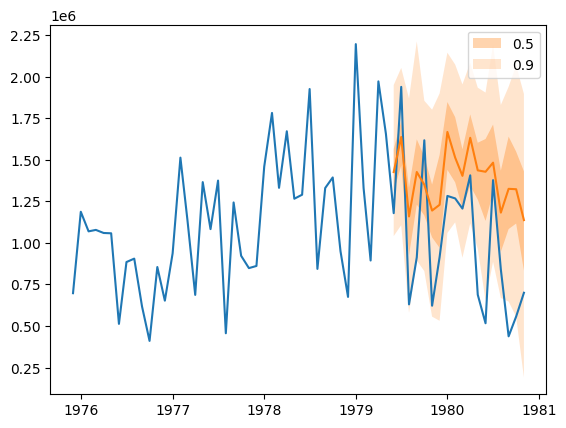

In [59]:
plt.plot(ts_entry[-150:].to_timestamp())
forecast_entry.plot(show_label=True)
plt.legend()

In [60]:
from gluonts.evaluation import Evaluator

evaluator = Evaluator(
    quantiles=[0.1, 0.3 ,0.5, 0.7, 0.9]
)

In [61]:
agg_metrics, item_metrics = evaluator(tss, forecasts)

Running evaluation: 617it [00:00, 5508.65it/s]
/usr/local/lib/python3.10/dist-packages/gluonts/time_feature/seasonality.py:47: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/usr/local/lib/python3.10/dist-packages/gluonts/time_feature/seasonality.py:47: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/usr/local/lib/python3.10/dist-packages/gluonts/time_feature/seasonality.py:47: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/usr/local/lib/python3.10/dist-packages/gluonts/time_feature/seasonality.py:47: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/usr/local/lib/python3.10/dist-packages/gluonts/time_feature/seasonality.py:47: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/usr/local/lib/python3.10/dist-packages/gluonts/

In [62]:
print(json.dumps(agg_metrics, indent=4))


{
    "MSE": 471579912.5131956,
    "abs_error": 27024612.7188887,
    "abs_target_sum": 116705274.77728981,
    "abs_target_mean": 10508.308551889952,
    "seasonal_error": 1743.9892909919095,
    "MASE": 2.022488235561931,
    "MAPE": 0.21468033888240465,
    "sMAPE": 0.22926481491850026,
    "MSIS": 14.730339252772993,
    "num_masked_target_values": 0.0,
    "QuantileLoss[0.1]": 13185618.418347374,
    "Coverage[0.1]": 0.04042859715469115,
    "QuantileLoss[0.3]": 24654385.753296934,
    "Coverage[0.3]": 0.13344138303619665,
    "QuantileLoss[0.5]": 27024612.766078815,
    "Coverage[0.5]": 0.24680352962362687,
    "QuantileLoss[0.7]": 22589922.52338568,
    "Coverage[0.7]": 0.4050963443183865,
    "QuantileLoss[0.9]": 11272520.424346834,
    "Coverage[0.9]": 0.7038537727354583,
    "RMSE": 21715.890783322604,
    "NRMSE": 2.0665448369820596,
    "ND": 0.23156290725042308,
    "wQuantileLoss[0.1]": 0.11298219762139852,
    "wQuantileLoss[0.3]": 0.21125339707519836,
    "wQuantileLos

In [63]:
item_metrics

,item_id,forecast_start,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,...,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.3],Coverage[0.3],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.7],Coverage[0.7],QuantileLoss[0.9],Coverage[0.9]
0,T1,1979-06,2.517969e+11,8.000238e+06,1.809953e+07,1.005530e+06,357444.166667,1.243433,0.632308,0.421266,...,4.200256e+06,0.444444,7.514809e+06,0.833333,8.000238e+06,0.888889,6.536885e+06,0.888889,3.013442e+06,0.944444
1,T2,1984-08,1.958694e+04,2.302614e+03,4.321230e+03,2.400683e+02,20.526496,6.232090,0.502235,0.698263,...,5.592663e+02,0.000000,1.497472e+03,0.000000,2.302614e+03,0.000000,2.965966e+03,0.000000,3.255206e+03,0.000000
2,T3,1986-01,6.479823e+04,4.383932e+03,1.422700e+04,7.903889e+02,84.615385,2.878339,0.294784,0.355910,...,1.443095e+03,0.000000,3.295292e+03,0.000000,4.383931e+03,0.055556,4.717193e+03,0.166667,3.116293e+03,0.277778
3,T4,1981-02,1.238605e+06,1.587587e+04,1.013980e+05,5.633222e+03,794.000000,1.110822,0.187129,0.159863,...,5.776679e+03,0.166667,1.289010e+04,0.500000,1.587587e+04,0.777778,1.555140e+04,0.888889,8.282375e+03,1.000000
4,T5,1985-12,5.344626e+01,1.096247e+02,7.808000e+02,4.337778e+01,3.484444,1.747843,0.137597,0.152784,...,6.083928e+01,0.000000,1.146391e+02,0.000000,1.096247e+02,0.055556,6.778447e+01,0.444444,2.479360e+01,0.944444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,T613,1971-06,6.053749e+06,3.883370e+04,1.515440e+05,8.419111e+03,658.100000,3.278267,0.233958,0.275888,...,1.279871e+04,0.000000,2.818657e+04,0.000000,3.883370e+04,0.166667,4.386381e+04,0.222222,3.084616e+04,0.277778
613,T614,1971-06,1.437411e+02,1.639699e+02,6.240000e+02,3.466667e+01,6.866667,1.326617,0.301095,0.274639,...,6.281908e+01,0.166667,1.339564e+02,0.277778,1.639699e+02,0.388889,1.780044e+02,0.611111,1.511811e+02,0.666667
614,T615,1978-06,1.812715e+01,6.610957e+01,5.482000e+02,3.045556e+01,1.809091,2.030166,0.117185,0.126605,...,3.963855e+01,0.000000,6.939160e+01,0.000000,6.610958e+01,0.000000,3.674622e+01,0.333333,1.588771e+01,1.000000
615,T616,1968-06,6.295475e+01,1.030554e+02,9.830300e+02,5.461278e+01,0.950196,6.025385,0.105318,0.112831,...,7.950261e+01,0.000000,1.251558e+02,0.000000,1.030554e+02,0.000000,2.956457e+01,0.388889,2.669698e+01,1.000000


In [66]:
from pathlib import Path

dar_predictor.serialize(Path("/tmp/"))

In [67]:
from gluonts.model.predictor import Predictor

predictor_deserialized = Predictor.deserialize(Path("/tmp/"))  #load it back from picklefile

In [68]:
predictor_deserialized